In [78]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [79]:
start=datetime.datetime(2023,1,1)
end=datetime.datetime.now()
apple=yf.download('AAPL',start=start,end=end)
apple.head()

C:\Users\RAM MOHAN\AppData\Local\Temp\ipykernel_2836\2086721820.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple=yf.download('AAPL',start=start,end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.470612,129.226052,122.582119,128.613985,112117500
2023-01-04,124.744118,127.014709,123.480487,125.267339,89113600
2023-01-05,123.421257,126.136090,123.164587,125.504275,80962700
2023-01-06,127.962395,128.623825,123.292887,124.398567,87754700
2023-01-09,128.485657,131.703978,128.228987,128.801572,70790800


In [80]:
# Check if the columns have a MultiIndex
if isinstance(apple.columns, pd.MultiIndex):
    # Drop the Ticker level if it exists
    apple.columns = apple.columns.droplevel('Ticker')
else:
    # If not a MultiIndex, columns are already in the correct format
    pass

# Verify the column structure
print("Column names:", apple.columns)

Column names: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [81]:
apple.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,123.470612,129.226052,122.582119,128.613985,112117500
2023-01-04,124.744118,127.014709,123.480487,125.267339,89113600
2023-01-05,123.421257,126.136090,123.164587,125.504275,80962700
2023-01-06,127.962395,128.623825,123.292887,124.398567,87754700
2023-01-09,128.485657,131.703978,128.228987,128.801572,70790800


In [82]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 650 entries, 2023-01-03 to 2025-08-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   650 non-null    float64
 1   High    650 non-null    float64
 2   Low     650 non-null    float64
 3   Open    650 non-null    float64
 4   Volume  650 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.5 KB


In [83]:
apple.columns.tolist()

['Close', 'High', 'Low', 'Open', 'Volume']

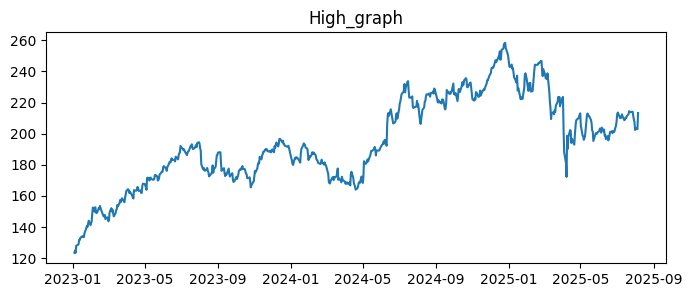

In [84]:
plt.figure(figsize=(8,3))
plt.plot(apple['Close'])
plt.title('High_graph')
plt.show()

C:\Users\RAM MOHAN\AppData\Local\Temp\ipykernel_2836\3179476501.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  apple = apple.asfreq('B').fillna(method='ffill')


<Figure size 1000x500 with 0 Axes>

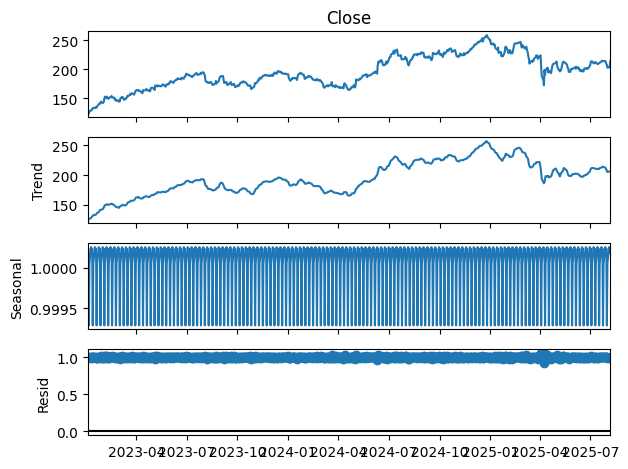

In [85]:
apple = apple.asfreq('B').fillna(method='ffill')
res = seasonal_decompose(apple['Close'], model='multiplicative')
plt.figure(figsize=(10, 5))
res.plot()
plt.show()

In [87]:
test_res=adfuller(apple['Close'].dropna())
print('Aapple Statistic:', test_res[0])
print('p-value:', test_res[1])
for key, value in test_res[4].items():
    print(f'Critical Value ({key}): {value}')

Aapple Statistic: -2.36384944543289
p-value: 0.15220060109353567
Critical Value (1%): -3.4401331487581754
Critical Value (5%): -2.865856987951189
Critical Value (10%): -2.569068936347423


In [88]:
apple['close_dif']=apple['Close'].shift(1)
res_diff=adfuller(apple['close_dif'].dropna())
print('Aapple Statistic (after differencing):', res_diff[0])
print('p-value:', res_diff[1])

Aapple Statistic (after differencing): -2.6222133811269397
p-value: 0.08849256910294129


In [89]:
apple['close_2']=apple['Close'].diff().diff()
result_diff2 = adfuller(apple['close_2'].dropna())
print('ADF Statistic (2nd differencing):', result_diff2[0])
print('p-value:', result_diff2[1])


ADF Statistic (2nd differencing): -10.797150418067996
p-value: 2.0616038194040452e-19


<Figure size 1000x400 with 0 Axes>

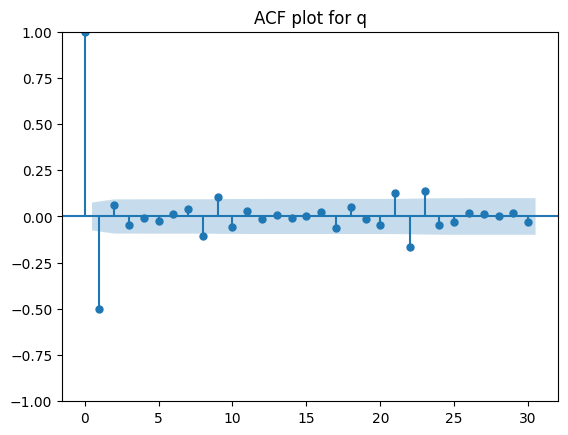

<Figure size 1000x400 with 0 Axes>

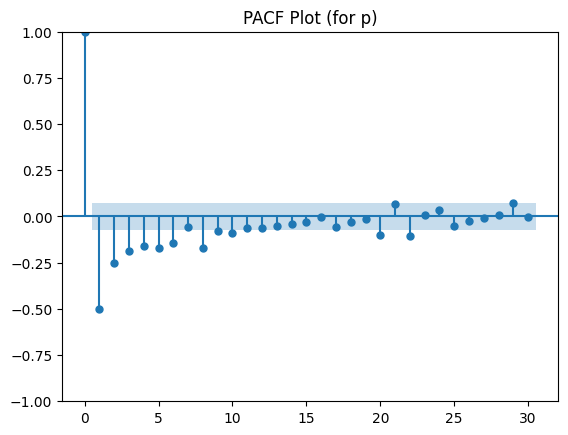

In [ ]:
close_2=apple['close_2'].dropna()

plt.figure(figsize=(10,4))
plot_acf(close_2,lags=30)
plt.title('ACF plot for q')
plt.show()

plt.figure(figsize=(10,4))
plot_pacf(close_2,lags=30)
plt.title("PACF Plot (for p)")
plt.show()

In [90]:
model=ARIMA(apple['Close'].dropna(),order=(1,2,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=10)
forecast


2025-08-07    213.892067
2025-08-08    214.050936
2025-08-11    214.185706
2025-08-12    214.319274
2025-08-13    214.452782
2025-08-14    214.586286
2025-08-15    214.719791
2025-08-18    214.853295
2025-08-19    214.986800
2025-08-20    215.120305
Freq: B, Name: predicted_mean, dtype: float64

Last actual date: 2025-08-06 00:00:00
Future dates: DatetimeIndex(['2025-08-07', '2025-08-08', '2025-08-09', '2025-08-10',
               '2025-08-11', '2025-08-12', '2025-08-13', '2025-08-14',
               '2025-08-15', '2025-08-16'],
              dtype='datetime64[ns]', freq='D')
Forecast DataFrame shape: (10, 1)
Forecast DataFrame head:
               Forecast
2025-08-07  213.892067
2025-08-08  214.050936
2025-08-09         NaN
2025-08-10         NaN
2025-08-11  214.185706


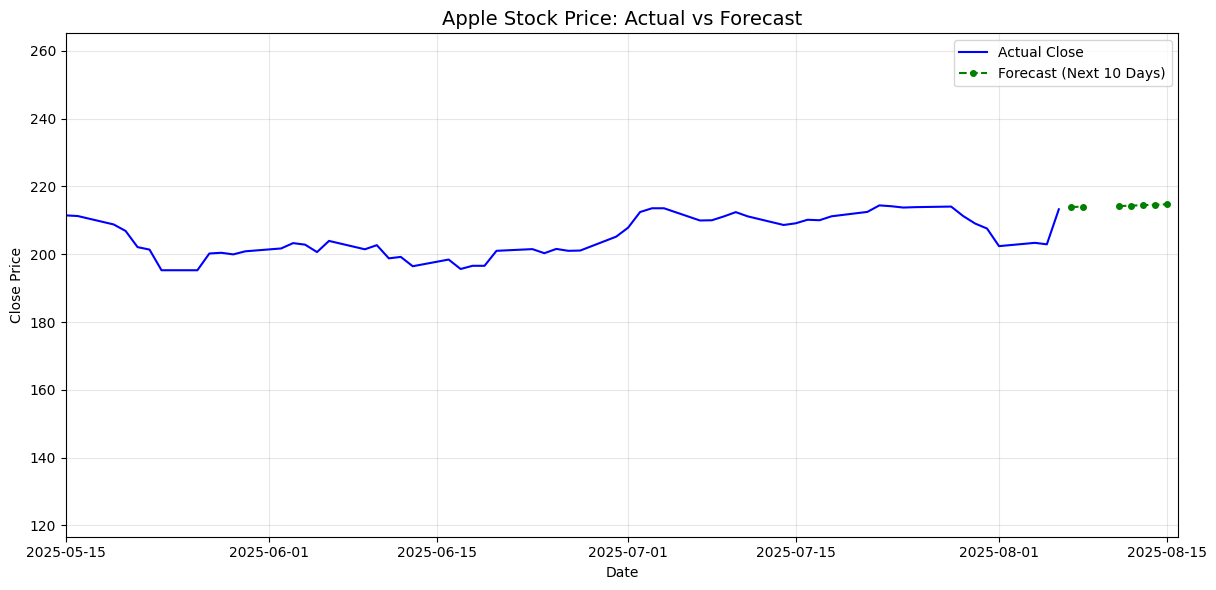


Actual data - Last 5 values:
Date
2025-07-31    207.570007
2025-08-01    202.380005
2025-08-04    203.350006
2025-08-05    202.919998
2025-08-06    213.250000
Freq: B, Name: Close, dtype: float64

Forecast data:
2025-08-07    213.892067
2025-08-08    214.050936
2025-08-09           NaN
2025-08-10           NaN
2025-08-11    214.185706
2025-08-12    214.319274
2025-08-13    214.452782
2025-08-14    214.586286
2025-08-15    214.719791
2025-08-16           NaN
Freq: D, Name: Forecast, dtype: float64

Any NaN in forecast: True


In [92]:

# Step 2: Create future dates for forecast
last_date = apple.index[-1]
print("Last actual date:", last_date)  # Debug: Check last date

# Create future dates - match the frequency of your original data
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=10, freq='D')
print("Future dates:", future_dates)  # Debug: Check future dates

# Step 3: Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Forecast': forecast
}, index=future_dates)

print("Forecast DataFrame shape:", forecast_df.shape)  # Debug
print("Forecast DataFrame head:\n", forecast_df.head())  # Debug

# Step 4: Plot actual and forecast separately to avoid merge issues
plt.figure(figsize=(12,6))

# Plot actual data
plt.plot(apple.index, apple['Close'], label='Actual Close', color='blue', linewidth=1.5)

# Plot forecast data
plt.plot(forecast_df.index, forecast_df['Forecast'], 
         label='Forecast (Next 10 Days)', color='green', linestyle='--', marker='o', markersize=4)

plt.title("Apple Stock Price: Actual vs Forecast", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Optional: Set x-axis limits to show recent data + forecast
recent_start = apple.index[-60]  # Show last 60 days of actual data
plt.xlim(recent_start, forecast_df.index[-1])

plt.show()

# Additional debugging: Check for any NaN values
print("\nActual data - Last 5 values:")
print(apple['Close'].tail())
print("\nForecast data:")
print(forecast_df['Forecast'])
print(f"\nAny NaN in forecast: {forecast_df['Forecast'].isna().any()}")



In [ ]:
# Calculate rolling statistics
rolling_mean = apple['Close'].rolling(window=30).mean()
rolling_std = apple['Close'].rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(12,6))
plt.plot(apple['Close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean (30 days)', color='red')
plt.plot(rolling_std, label='Rolling Std (30 days)', color='black')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [ ]:
# Calculate daily returns
apple['Daily Return'] = apple['Close'].pct_change()
apple['Daily Return'].dropna(inplace=True)

# Plot daily returns
plt.figure(figsize=(12, 4))
apple['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title('Daily Return')
plt.show()

In [ ]:
# Plot distribution of daily returns
plt.figure(figsize=(10,6))
apple['Daily Return'].hist(bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate cumulative return
cumulative_return = (1 + apple['Daily Return']).cumprod()

# Plot cumulative return
plt.figure(figsize=(12,6))
cumulative_return.plot()
plt.title('Cumulative Return over Time')
plt.show()